In [10]:
import numpy as np
import pandas as pd
import numpy.random as rng
import json
import matplotlib.pyplot as plt

# Plot Evaluation Results

In [11]:
with open('evaluation_results.json', 'r') as f:
    cfg = json.load(f)

In [12]:
output_cols = cfg['output_cols']
labels = [l.replace('process_','') for l in output_cols]
model_names = [m['name'] for m in cfg['model_cfgs']]

cols = []
for m in cfg['model_cfgs']:
    cols.append([m['test_mae_by_output'][c] for c in output_cols])
cols = np.array(cols)

results_df = pd.DataFrame(data=np.array(cols), columns=labels, index=model_names).T
results_df
#means_df = pd.DataFrame(data=np.array(mean_maes).T, columns=model_names, index=labels)

,Null,Constrained ANN,ANN
Hydrogen,0.000014,0.000014,0.000014
Methane,0.000059,0.000042,0.000020
Ethane,0.001352,0.000183,0.000123
Propane,0.007388,0.000286,0.000230
i-Butane,0.009341,0.000287,0.000293
n-Butane,0.006055,0.000208,0.000182
i-Pentane,0.003943,0.001545,0.002232
n-Pentane,0.003707,0.001578,0.001490
Cyclopentane,0.000047,0.000006,0.000006
22-Mbutane,0.012708,0.002070,0.001965


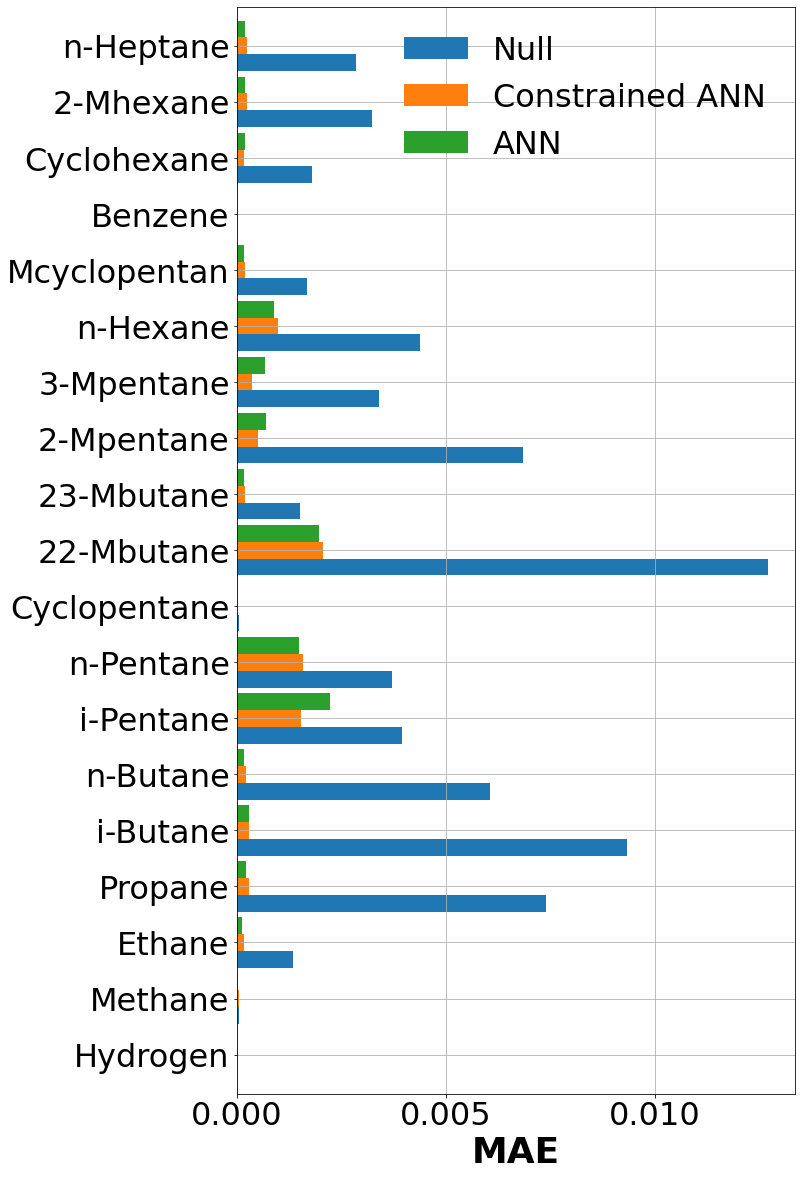

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 20))
results_df.plot.barh(ax=ax, width=0.90)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylabel('')
ax.set_xlabel('MAE', fontsize=36, fontweight='bold')
ax.grid(True)
ax.legend(fontsize=32, frameon=False)